# Clase 4-5 Regresion Lineal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = ('https://raw.githubusercontent.com/adrishg/Intersemestral_MachineLearning_Proteco2020/master/DataSets/regresionLineal.csv')
data = pd.read_csv(url)
data.head()

,poblacion,beneficio
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe() #Nos las cuenta, nos describe todo, percentiles son los porcentajes

,poblacion,beneficio
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   poblacion  97 non-null     float64
 1   beneficio  97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


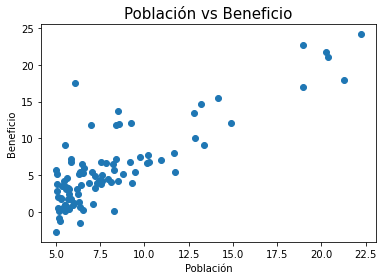

In [5]:
#Gráfica para visualizar los datos
X = data.poblacion.values    #Con esto se forma un vector
Y = data.beneficio.values   # 
plt.scatter(X,Y)
plt.xlabel('Población'), plt.ylabel('Beneficio')
plt.title('Población vs Beneficio', size=15)
plt.show()

### 1) Separar los datos de entrenamiento a los de test

In [6]:
def separacionDatos(X,Y,tamanhoTest=0.2): #Para el entrenamiento
    m = Y.size #Número de datos que tenemos (Puede ser X)
    
    #Tomo valores para el índice Test, cuantos van a test
    testTamanho = int(m*tamanhoTest)  #Por qué no nos puede tomar un valor flotante, son datos
    
    #Indices para el Test, te regresa los que usamos para test
    indicesTest = np.random.choice(m,testTamanho) #Elige aleatoriamente ciertos elementos, de esos m elementos de testTamanho
    
    #Indices para el entramiento, quito los del test y me quedo con los del entrenamiento
    indicesEntrenamiento = np.setdiff1d(np.arange(m),indicesTest)   #Nos hace como una resta de que elementos de una lista  no estan en la segunda lista
    
    
    #Separamos las datos en 4 grupos
    return X[indicesTest], Y[indicesTest], X[indicesEntrenamiento], Y[indicesEntrenamiento]

### 2) Función de hipótesis

In [7]:
def funcionHipotesis(X,theta):
    h = X @ theta #@ es un forma de multiplicar vector por vector
    return h

### 3) Función de Costo

In [8]:
def funcionCosto(X,Y,theta): #Que sea convenxa
    
    h = funcionHipotesis(X,theta) #Nos va a regresar un vector
    m = Y.size                  #En este ejemplo es 97
    variableDump = h - Y        #Lo que va adentro del parentesis
    j = (variableDump @ variableDump)/(2*m)    
    return j

    
    

### 4) Función de gradientes de la función de costo

In [9]:
def gradienteCostos(X,Y,theta):   #Para saber como es la pendiente en cada punto, para iterar de una manera acertada
    m = Y.size
    h = funcionHipotesis(X,theta)
    dj = ((h-Y)@ X)/m #Derivada de la función de costos
    return dj

### 5) Gradiente de Descenso

In [10]:
def gradienteDescenso(X,Y,alpha,E=0.001): #El error es para saber que tanto se separan las iteraciones, si la iteración ya es menor que el error ya se acepta
    m = Y.size
    X = np.hstack([np.ones([m,1]),X])  #Es el valor que multiplica a theta 1
    n = X.shape[1]
    theta = np.zeros([n])     #Lo inicializamos como queramos, con aletorios o ceros
    
    costoAnterior = funcionCosto(X,Y,theta)  #La función de costo manda a llamar a la función de hipotesis a la vez
    theta = theta-alpha*gradienteCostos(X,Y,theta)
    costoActual = funcionCosto(X,Y,theta) #Volvemos a tomar la función 
    
    diferenciaCostos = abs(costoActual - costoAnterior) 
    #if diferenciaCostos == E
    numIteraciones = [0,1]
    yCostos = [costoAnterior, costoActual]
    i = 2
    
    while diferenciaCostos > E: #Mientras no converga, es decir que la derivada sea diferente de cero
        costoAnterior = funcionCosto(X,Y,theta)
        theta = theta-alpha*gradienteCostos(X,Y,theta)
        costoActual = funcionCosto(X,Y,theta) #Volvemos a tomar la función
        
        diferenciaCostos = abs(costoActual - costoAnterior) 
        
        numIteraciones.append(i) #Nuestra lista de contadores
        yCostos.append(costoActual)
        i = i+1
        
    plt.plot(numIteraciones, yCostos)
    plt.title('Función de costo con respecto a las iteraciones')
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo')
    print('El último costo es: ', yCostos[-1])
    plt.show()
    
    return theta

### Llamamos a las funciones

El último costo es:  6.845671327877614


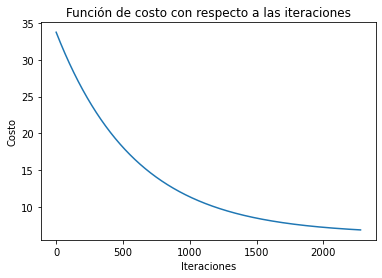

In [11]:

alpha=0.00001
X = X.reshape([Y.size,1])  #Si hace falta rellenalo con uno

#Separación entre test y training
xTest, yTest, xEntrenamiento, yEntrenamiento =separacionDatos(X,Y)
theta = gradienteDescenso(xEntrenamiento, yEntrenamiento, alpha)

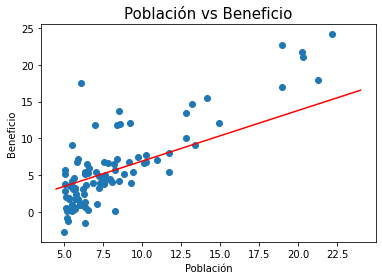

In [12]:
#Gráfica para visualizar los datos
X = data.poblacion.values    #Con esto se forma un vector
Y = data.beneficio.values   # 
plt.scatter(X,Y)

x = np.linspace(4.5,24,)
y = theta[0] + theta[1]*x
plt.plot(x,y,'r')
plt.xlabel('Población'), plt.ylabel('Beneficio')
plt.title('Población vs Beneficio', size=15)
plt.show()

In [13]:
#Predecir el valor de algun dato en nuestro test Set
#Sólo está tomando los valores del test, no los noventa datos 
print('El valor en x es: ' + format(xTest[15])) 
print('El valor en y es: ' + format(yTest[15]))
yPredicho = theta[0]+theta[1]*xTest[15]
print('El valor predicho de y es: ' + format(yPredicho))


El valor en x es: [7.6366]
El valor en y es: 4.2959
El valor predicho de y es: [5.30020227]


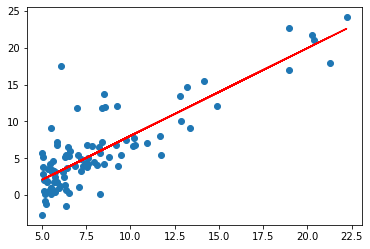

In [14]:
#Hacerlo desde sklearn 

from sklearn.linear_model import LinearRegression

X = data['poblacion'].values.reshape(-1,1)
Y = data['beneficio'].values.reshape(-1,1)

modeloDeRegresion = LinearRegression() #
modeloDeRegresion.fit(X,Y) #Aquí lo entrenamos
yPredicha = modeloDeRegresion.predict(X) #Aquí vemos si ya salió 

theta1 = modeloDeRegresion.coef_[0][0]   #Theta cero
theta0 = modeloDeRegresion.intercept_[0] #Theta uno

plt.scatter(data['poblacion'],data['beneficio'])
plt.plot(X,yPredicha, 'r')
plt.show()